              precision    recall  f1-score   support

        mild     0.2899    0.5947    0.3898      9514
        safe     0.9792    0.9059    0.9411    143334
      severe     0.5782    0.7738    0.6619      2197
       toxic     0.5647    0.5638    0.5642      4514

    accuracy                         0.8758    159559
   macro avg     0.6030    0.7095    0.6393    159559
weighted avg     0.9209    0.8758    0.8938    159559



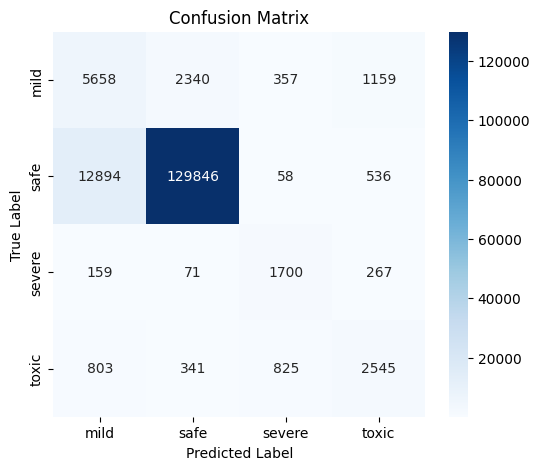

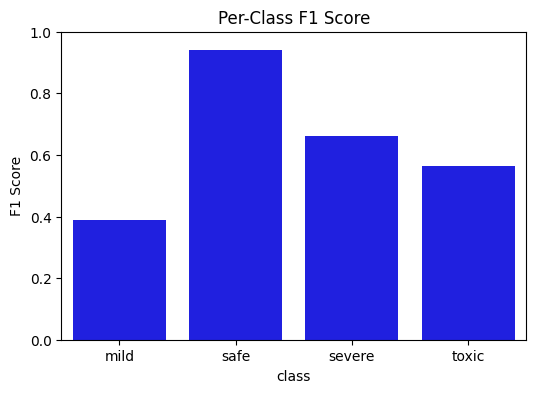

In [1]:
# notebooks/01_baseline_experiments.ipynb

# =============================
# 01. Baseline Experiments
# =============================

import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("../../data/processed/jigsaw_multilevel_features.csv")

X = df['text']
y = df['label']

le = joblib.load("../../models/saved/label_encoder.pkl")
y_enc = le.transform(y)

vectorizer = joblib.load("../../models/saved/vectorizer.pkl")
model = joblib.load("../../models/saved/xgboost.pkl")

X_vec = vectorizer.transform(X)

numeric_cols = ["char_count", "word_count", "num_uppercase", "num_exclamation", "num_question", "has_swear"]
X_num = df[numeric_cols].values

from scipy.sparse import hstack
X_combined = hstack([X_vec, X_num])

y_pred_enc = model.predict(X_combined)
y_pred = le.inverse_transform(y_pred_enc)

print(classification_report(y, y_pred, target_names=le.classes_, digits=4))

cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

report = classification_report(y, y_pred, target_names=le.classes_, output_dict=True)
f1_scores = [report[label]['f1-score'] for label in le.classes_]

df_f1 = pd.DataFrame({
    "class": le.classes_,
    "f1_score": f1_scores
})

plt.figure(figsize=(6,4))
sns.barplot(data=df_f1, x="class", y="f1_score", color="blue")
plt.title("Per-Class F1 Score")
plt.ylabel("F1 Score")
plt.ylim(0,1)
plt.show()
